# Práctica individual: Clustering, técnicas de agrupamiento

Alberto Gonzalez Isorna

El objetivo de esta actividad agrupar un conjunto de clientes según el gasto y los productos que compran.  

Los pasos que seguiremos serán los siguientes:

1. Análisis descriptivo de los datos
2. Tratamiento de missing (si los hay)
3. Tratamiento de variables categóricas
4. Análisis gráfico de los datos
5. Normalización y Separación de datos
6. Agrupamiento mediante el algoritmo K-means
7. Métricas de ajuste
8. Análisis de resultados obtenidos
9. Conclusiones

# Análisis descriptivo de los datos

El conjunto de datos se refiere a los clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias (m.u.) en diversas categorías de productos

Primeramente haremos una importación de liberías y luego analizaremos los datos mas importantes. 

## Importación de librerías

In [1]:
import io #modulo para realizar distintas operaciones en Python.
import pandas as pd #Librería de análisis de datos.
import matplotlib.pyplot as plt #Libraría de representación de gráficas.
import seaborn as sns #Herramienta de visualización de datos.
import numpy as np #Numpy facilita un largo set de tipos de datos numéricos para construir arrays.
from scipy.stats import norm #Librería con herramientas y algoritmos matemáticos.

## Descripcion de los datos

**Atributos:**

1. FRESH: gasto anual (m.u.) en productos frescos (Continuo);
2. MILK: gasto anual (m.u.) en productos lácteos (Continuo);
3. GROCERY: gasto anual (m.u.) en productos comestibles (Continuo);
4. FROZEN: gasto anual (m.u.) en productos congelados (Continuo)
5. DETERGENTS_PAPER: gasto anual (m.u.) en detergentes y productos de papel (Continuo)
6. DELICATESSEN: gasto anual (m.u.) en productos delicatessen (Continuo);
7. CHANEL: canal de clientes - Horeca (hotel / restaurante / cafetería) o canal minorista (Nominal)
8. REGIÓN: Región de los clientes - Lisnon, Oporto u Otro (Nominal)


## Lectura de ficheros de datos

In [2]:
#Read CSV 
csvname  = 'Wholesale customers data.csv'

spend_data = pd.read_csv(
    csvname,
    #header=None,
    encoding='utf-8',
    #delim_whitespace=True,
    #names=[],
)
#Previsualización los datos
spend_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


## Características de los datos

In [3]:
# Analisis descriptivo - Todas las variables
spend_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Vemos por ejemplo como las compras en productos comestibles son las que mas beneficios dan a la empresa, y además las que mas desviación tienen, es decir que hay clientes muy diversos. 

In [4]:
# Dimensiones de los datos
m,n = spend_data.shape
print('Colmunas/Variables => \t {} \nFilas/Ocurrencias => \t{}'.format(n,m))

Colmunas/Variables => 	 8 
Filas/Ocurrencias => 	440


# Tratamiento de los missing

Para tratar los missing vamos a ver el tipo de datos (para ver si hay caracteres extraños) y veremos tambien si hay algun tipo de caracter nulo 

In [5]:
# vamos a chequear el tipo de los datos
spend_data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Vemos como todas las variables son enteras

## Caracteres Nulos

In [6]:
#Comprobación de datos nulos
spend_data.isnull().any() 

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

Vemos que ninguna columan tiene caracteres nulo como habiamos podido leer en el documento de referencia del dataset. 

## Caracteres desconocidos

In [12]:
# caracteres desconocidos
c = '?'
s = (c in spend_data.values)
print('\nCaracteres desconocidos "{}" : {}'.format(c,s))


Caracteres desconocidos "?" : False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


No hay caracteres desconocidos

# Tratamiento de variables categóricas

En este caso son todas las variables enteras, y dado que estamos haciendo clustering, no nos importa tener variables discretas y continuas si son numéricas. 

# Análisis gráfico de los datos

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


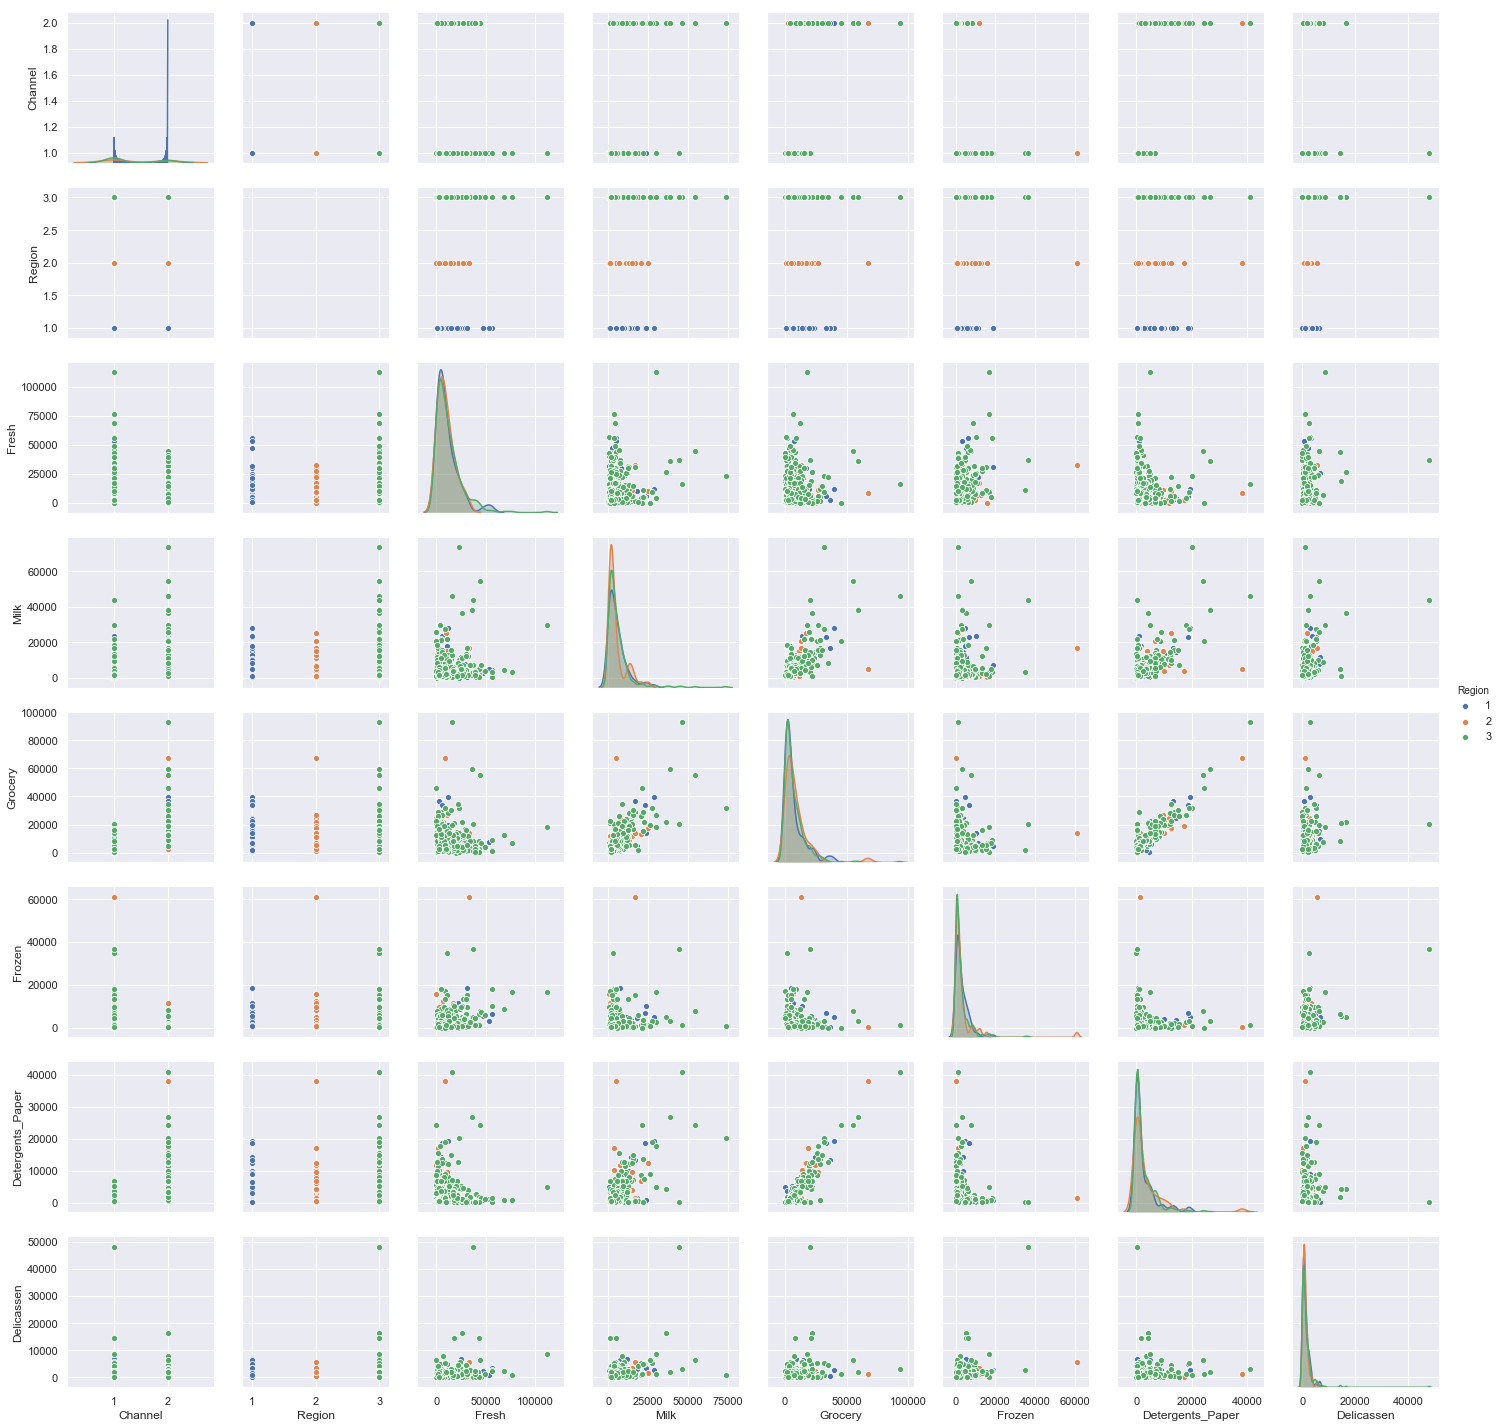

In [13]:
#scatterplot
sns.set()
sns.pairplot(spend_data,hue="Region")
plt.show()

## Variables destacadas

### Grocery

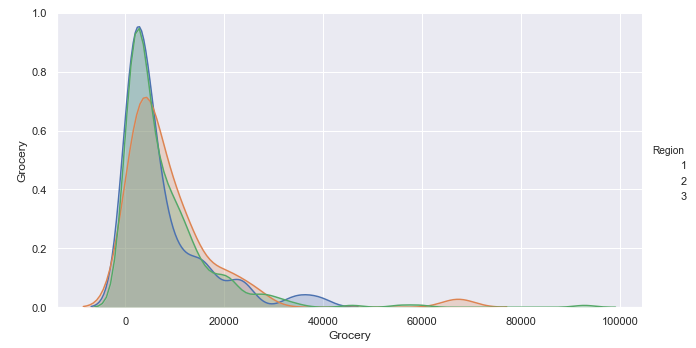

In [14]:
xvar = 'Grocery'
yvar = 'Grocery'

sns.pairplot(spend_data, hue="Region", x_vars=[xvar], y_vars=[yvar], height=5, aspect=1.8)
plt.show()

In [15]:
"""
Comprobamos los valores de asimetría y curtosis (grado de concentración)
  - Asimetría:
    skew = 0, simétrica, approx. misma cantidad de valores a los dos lados de la media
    skew > 0, valores se tienden a reunir más en la parte izq
    skew < 0, los valores tienden a reunirse más en la parte dcha
  - Curtosis:
    kurt = 0, mesocúrtica  / normal
    kurt > 0, leptocúrtica / apuntada
    kurt < 0, platicúrtica / aplanada 
"""
print("Asimetría: %f" % spend_data[xvar].skew())
print("Curtosis: %f" % spend_data[yvar].kurt())

Asimetría: 3.587429
Curtosis: 20.914670


Vemos como los valores se tienden a reunir en la parte izquierda, quiere decir que hay una amplia mayoría que gasta una cantidad entorno a los mil y luego tambien hay algunos que gastan valores por encima. Por debajo, es decir de 0 a 1000, hay muy pocos gastos.  

### Grocery vs Paper

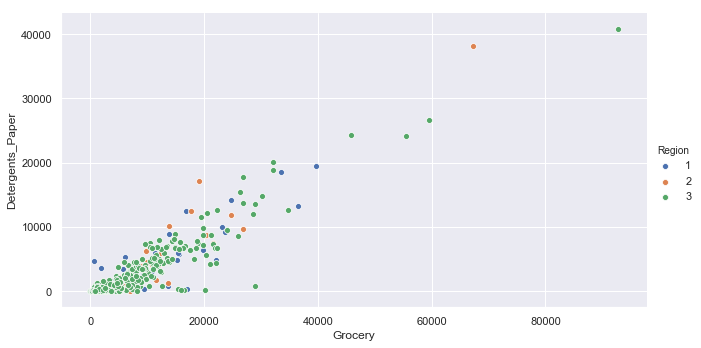

In [16]:
xvar = 'Grocery'
yvar = 'Detergents_Paper'

sns.pairplot(spend_data, hue="Region", x_vars=[xvar], y_vars=[yvar], height=5, aspect=1.8)
plt.show()

Se observa cierta relación directa entre las compras alimentarias y detergentes.  

### Canal y Region

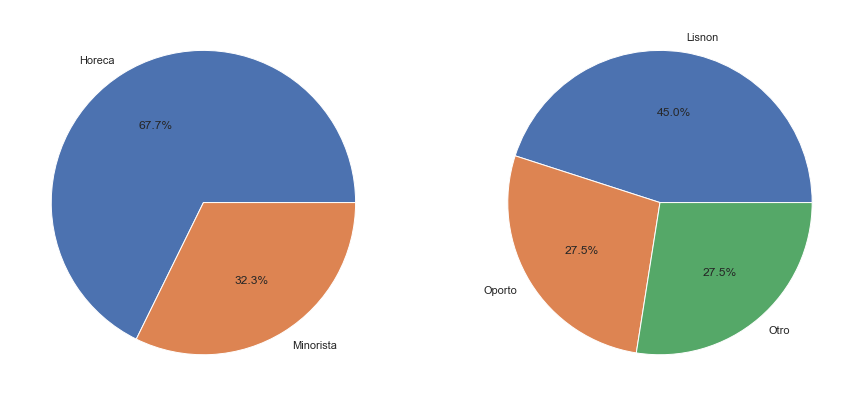

In [17]:
plt.figure(figsize=(15,10))

## Porcentajes Canal
plt.subplot(121)
labels = ['Horeca', 'Minorista']

a = (spend_data['Channel'] == 1).sum()
b = (spend_data['Channel'] == 2).sum()

plt.pie([a,b], labels=labels,autopct='%1.1f%%')

## Porcentajes Region
plt.subplot(122)
xvar = 'Region'
labels = ['Lisnon', 'Oporto', 'Otro']

a = (spend_data[xvar] == 1).sum()
b = (spend_data[xvar] == 2).sum()
c = (spend_data[xvar] == 2).sum()

plt.pie([a,b,c], labels=labels,autopct='%1.1f%%')
plt.show()

En el gráfico de la izquierda, podemos observar como la mayoría de compras son a mayoristas. 

En el de la derecha, vemos como la mayoróia de compras provienen de Lisnon. Le siguen Oporto y el resto de ciudades con el mismo porcentaje (27.5).  

# Normalización y Separación de datos

Primero normalizamos los datos de 0 a 1 

## Normalización

In [18]:
from sklearn import preprocessing

# escalamos data
dfcopy = spend_data.copy()
x = spend_data.values #returns a numpy array
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)

# spendf es nuestro dataframe final
spendf = pd.DataFrame(x_scaled)
spendf.columns =  spend_data.columns
spendf.head(8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
5,1.0,1.0,0.083907,0.111706,0.055218,0.010535,0.043896,0.030204
6,1.0,1.0,0.108098,0.042809,0.075148,0.007478,0.076842,0.011306
7,1.0,1.0,0.067554,0.066732,0.101566,0.027020,0.081276,0.053463


## Separacion de datos

Quitamos los datos que no nos van a ayudar para el clustering

In [19]:
toquit = ['Channel','Region']
print('Variables que hemos quitado := {}'.format(toquit))

# Dataframe final
xdf  = spendf.drop(toquit, axis=1)
xdf.head(8)

Variables que hemos quitado := ['Channel', 'Region']


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
5,0.083907,0.111706,0.055218,0.010535,0.043896,0.030204
6,0.108098,0.042809,0.075148,0.007478,0.076842,0.011306
7,0.067554,0.066732,0.101566,0.027020,0.081276,0.053463


# Agrupamiento mediante el algoritmo K-means

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

## Encontramos el valor de K

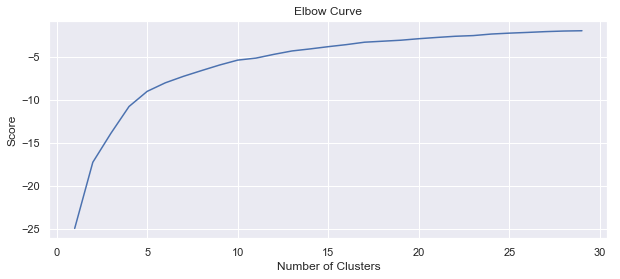

In [21]:
X = xdf.copy()
Nc = range(1, 30)

kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

# representamos
plt.figure(figsize=(10,4))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Ejecutamos K-Means

In [22]:
# elegimos el numero de cluster
Ncluster = 6
# hacemos el clustering
kmeans = KMeans(n_clusters=Ncluster).fit(X)
# Calculamos los centroides
centroids = kmeans.cluster_centers_

cdf = pd.DataFrame(centroids,columns=xdf.columns)
cdf.head(Ncluster)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.053867,0.113858,0.134704,0.024872,0.122630,0.034514
1,0.228270,0.591011,0.662548,0.042913,0.734156,0.056441
2,0.308148,0.062496,0.059363,0.095748,0.020392,0.043001
3,0.081539,0.033561,0.034026,0.045807,0.016939,0.019994
4,0.463842,0.430824,0.199271,0.489785,0.066040,0.409955
5,0.050036,0.222192,0.285129,0.027882,0.324204,0.042497


### Representamos resultados

In [23]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = centroids
colores=['red','green','blue','cyan','yellow','black','orange']
colores = colores[0:Ncluster]

asignar=[]
for row in labels:
    asignar.append(colores[row])


In [24]:
def plotmi_scatter(xdf,x1,x2,color_df,color_centroids):
    """
    xdf = dataframe
    x1  = Variable 1 (string)
    x2  = Variable 2 (string)
    """
    v = list(xdf.columns) # para buscar por columnas
    px1 = v.index(x1) #posicion argumento 1
    px2 = v.index(x2) # powicion argumento 2
    # dibujamos la figura
    plt.figure(figsize=(12,5)) 
    plt.scatter(xdf[x1], xdf[x2], c=color_df, s=70,edgecolors='black', alpha=0.6)
    plt.scatter(C[:, px1], C[:, px2], marker='*', c=color_centroids, s=1000, edgecolors='black')
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.show()

In [25]:
def plotmi_scatter2(xdf,x1,color_df,color_centroids,N):
    """
    xdf = dataframe
    """
    v = list(xdf.columns) # para buscar por columnas

    
    plt.figure(figsize=(10,5))
    M = int(np.ceil(N/3))
    # dibujamos las figuras
    for i in range(0,N):
        x2 = v[i]
        px1 = v.index(x1) #posicion argumento 1
        px2 = v.index(x2) # powicion argumento 2
        
        plt.subplot(M,3,i+1) 
        plt.scatter(xdf[x1], xdf[x2], c=color_df, s=70,edgecolors='black', alpha=0.6)
        plt.scatter(C[:, px1], C[:, px2], marker='*', c=color_centroids, s=1000, edgecolors='black')
        plt.xlabel(x1)
        plt.ylabel(x2)
    plt.show()

### Fresh - Milk

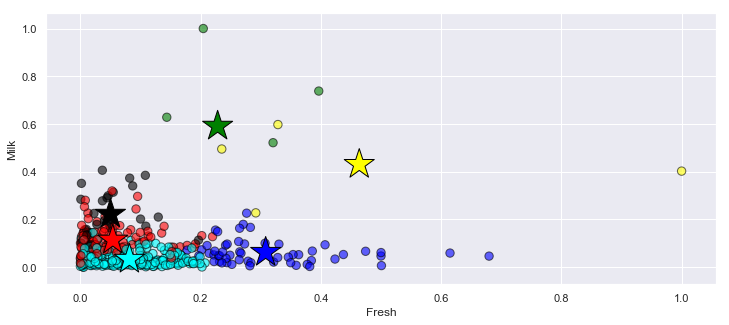

In [29]:
x1 = 'Fresh'
x2 = 'Milk'
plotmi_scatter(xdf,x1,x2,asignar,colores)

### Grocery - Frozen

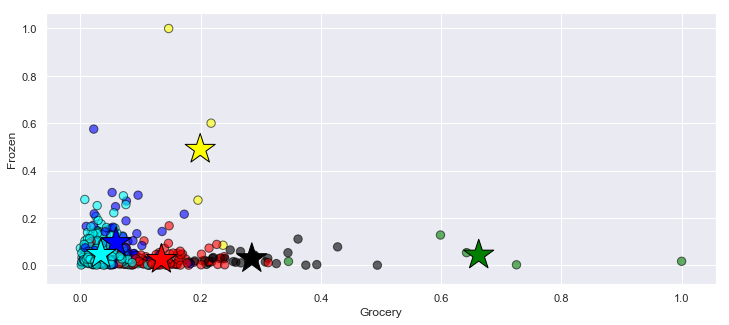

In [27]:
x1 = 'Grocery'
x2 = 'Frozen'
plotmi_scatter(xdf,x1,x2,asignar,colores)

## Detergents Papers - Delicatessen

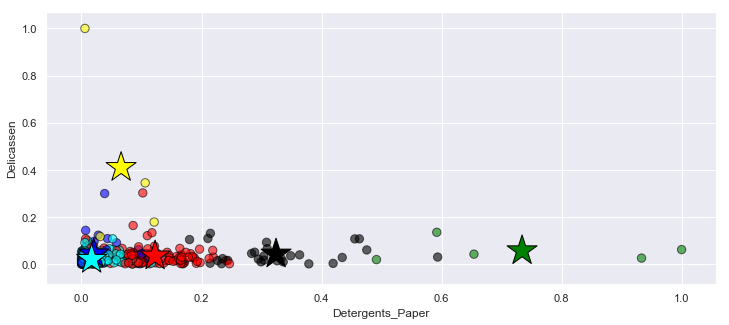

In [28]:
x1 = 'Detergents_Paper'
x2 = 'Delicassen'
plotmi_scatter(xdf,x1,x2,asignar,colores)

### Comparación de 3 variables

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x1 = 'Detergents_Paper'
x2 = 'Delicassen'
x3 = 'Detergents_Paper'

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig,azim = 230)
ax.scatter(xdf[x1], xdf[x2], xdf[x3], c=asignar,s=70,edgecolors='black')
ax.scatter(C[:, v.index(x1)], C[:, v.index(x2)], C[:, v.index(x3)], marker='*', c=colores, s=1000,edgecolors='black')


### Uno vs Todos

In [ ]:
x1 = 'Grocery'

plotmi_scatter2(xdf,x1,asignar,colores,6)

# Métricas de ajuste

In [ ]:
# score
sc = kmeans.fit(X).score(X)

# silhouette
from sklearn import metrics
si = metrics.silhouette_score(X,labels)
            
s1 = 'Score = {}'
s2 = 'Silhouette = {}'

print((s1+'\n'+s2).format(sc,si))

# Análisis de resultados obtenidos

In [ ]:
dfa = pd.DataFrame(asignar,columns=['h'])

In [ ]:
df_colors = dfa.groupby('h')['h'].count()
print(df_colors)

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(df_colors,autopct='%1.1f%%',pctdistance=1.2,colors = df_colors.index,labels = df_colors.index,)
plt.show()